In [89]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(Seurat)
library(tidyverse)
library(ggpubr)
setwd('/data/APAproject/post_qual/data/')

In [90]:
## read in the sequencing metadata and plot per sample per study
seq_md <- read.table('sequencing_metadata.tsv', sep='\t', header = T)
seq_md

Study,Sample,Pathology,mrpc,mgpc,ENC
<chr>,<chr>,<chr>,<int>,<int>,<int>
Paul_ALS,C9ALSFTLD1,C9ALSFTLD,31687,2573,5361
Paul_ALS,C9ALSFTLD2,C9ALSFTLD,29417,2323,10538
Paul_ALS,C9ALSFTLD3,C9ALSFTLD,53840,3531,11007
Paul_ALS,C9ALSFTLD4,C9ALSFTLD,73946,2568,6190
Paul_ALS,C9ALSFTLD5,C9ALSFTLD,138472,1201,4048
Paul_ALS,C9ALSFTLD6,C9ALSFTLD,125952,1378,4734
Paul_ALS,C9ALSFTLD7,C9ALSFTLD,56232,3471,9231
Paul_ALS,C9ALSnoFTLD1,C9ALSnoFTLD,52180,4210,11184
Paul_ALS,C9ALSnoFTLD2,C9ALSnoFTLD,97426,1385,4279


In [91]:
## remove AD6 from Shun
seq_md <- seq_md %>% filter(Sample!='AD6')
seq_md

Study,Sample,Pathology,mrpc,mgpc,ENC
<chr>,<chr>,<chr>,<int>,<int>,<int>
Paul_ALS,C9ALSFTLD1,C9ALSFTLD,31687,2573,5361
Paul_ALS,C9ALSFTLD2,C9ALSFTLD,29417,2323,10538
Paul_ALS,C9ALSFTLD3,C9ALSFTLD,53840,3531,11007
Paul_ALS,C9ALSFTLD4,C9ALSFTLD,73946,2568,6190
Paul_ALS,C9ALSFTLD5,C9ALSFTLD,138472,1201,4048
Paul_ALS,C9ALSFTLD6,C9ALSFTLD,125952,1378,4734
Paul_ALS,C9ALSFTLD7,C9ALSFTLD,56232,3471,9231
Paul_ALS,C9ALSnoFTLD1,C9ALSnoFTLD,52180,4210,11184
Paul_ALS,C9ALSnoFTLD2,C9ALSnoFTLD,97426,1385,4279


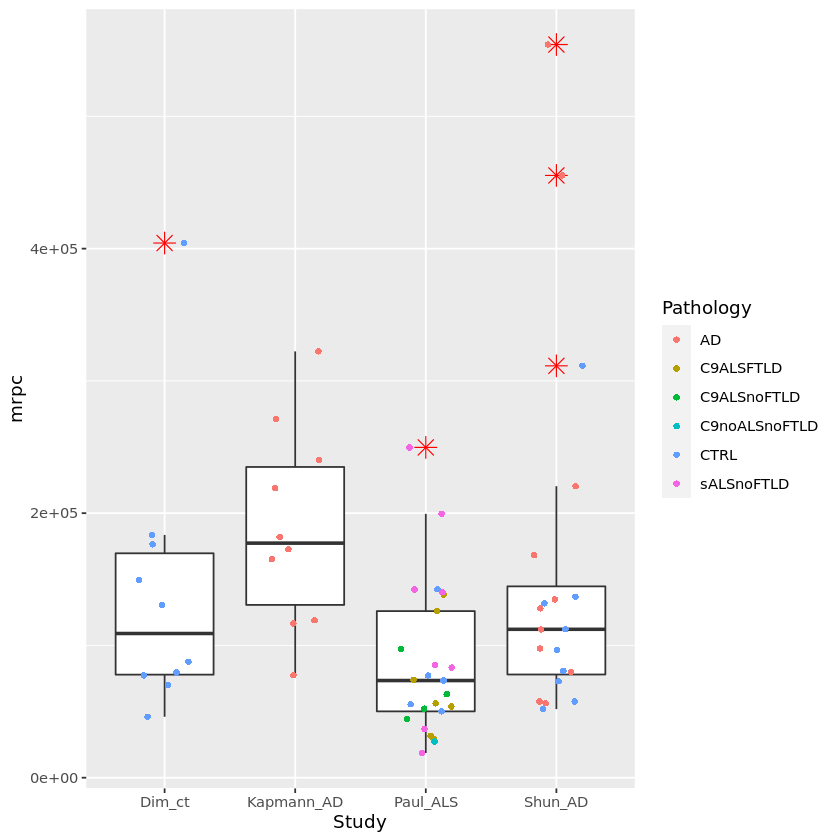

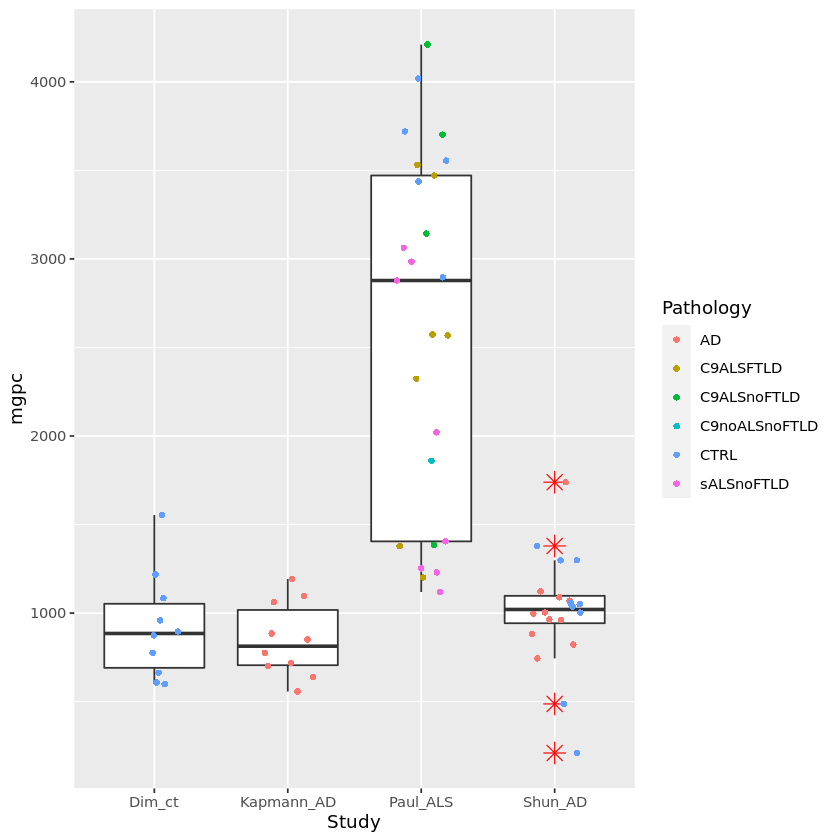

In [72]:
p <- ggplot(seq_md, aes(x=Study, y=mrpc)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) + 
    geom_jitter(aes(colour = Pathology), shape=16, position=position_jitter(0.2))
p

p <- ggplot(seq_md, aes(x=Study, y=mgpc)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) + 
    geom_jitter(aes(colour = Pathology), shape=16, position=position_jitter(0.2))
p

In [92]:
## lets look at the correlation of of stuff in Shun et al
shun_peak_stat <- read.table('/data1/APA/Shun_Lau/data/results/Shun_AD_CT_peak_stat.tsv', sep='\t', header=T)
shun_peak_stat

,samples,median_peak_count,median_feature_count
,<chr>,<dbl>,<dbl>
1,AD1,4975.0,4138.0
2,AD10,4589.0,3943.5
3,AD13,5396.5,3946.0
4,AD19,6645.0,5237.0
5,AD2,4272.0,3644.0
6,AD20,4700.0,3967.5
7,AD21,3944.0,3291.0
8,AD4,4085.0,3406.0
9,AD5,3560.0,3066.0


In [93]:
Shun_seq_stat <- seq_md %>% filter(Study=='Shun_AD')
Shun_seq_stat

Study,Sample,Pathology,mrpc,mgpc,ENC
<chr>,<chr>,<chr>,<int>,<int>,<int>
Shun_AD,AD1,AD,134784,1070,5272
Shun_AD,AD2,AD,57619,964,12805
Shun_AD,AD4,AD,168290,744,4574
Shun_AD,AD5,AD,79724,822,9502
Shun_AD,AD8,AD,455325,1739,840
Shun_AD,AD9,AD,97673,882,7805
Shun_AD,AD10,AD,56299,1123,13411
Shun_AD,AD13,AD,554271,996,1440
Shun_AD,AD19,AD,220381,1089,3353


In [94]:
Shun_seq_stat <- arrange(Shun_seq_stat, Sample)
Shun_seq_stat$median_peak_count <- arrange(shun_peak_stat, samples)$median_peak_count
Shun_seq_stat$median_feature_count <- arrange(shun_peak_stat, samples)$median_feature_count
Shun_seq_stat

Study,Sample,Pathology,mrpc,mgpc,ENC,median_peak_count,median_feature_count
<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Shun_AD,AD1,AD,134784,1070,5272,4975.0,4138.0
Shun_AD,AD10,AD,56299,1123,13411,4589.0,3943.5
Shun_AD,AD13,AD,554271,996,1440,5396.5,3946.0
Shun_AD,AD19,AD,220381,1089,3353,6645.0,5237.0
Shun_AD,AD2,AD,57619,964,12805,4272.0,3644.0
Shun_AD,AD20,AD,112091,963,7749,4700.0,3967.5
Shun_AD,AD21,AD,128048,1004,6639,3944.0,3291.0
Shun_AD,AD4,AD,168290,744,4574,4085.0,3406.0
Shun_AD,AD5,AD,79724,822,9502,3560.0,3066.0


`geom_smooth()` using formula 'y ~ x'



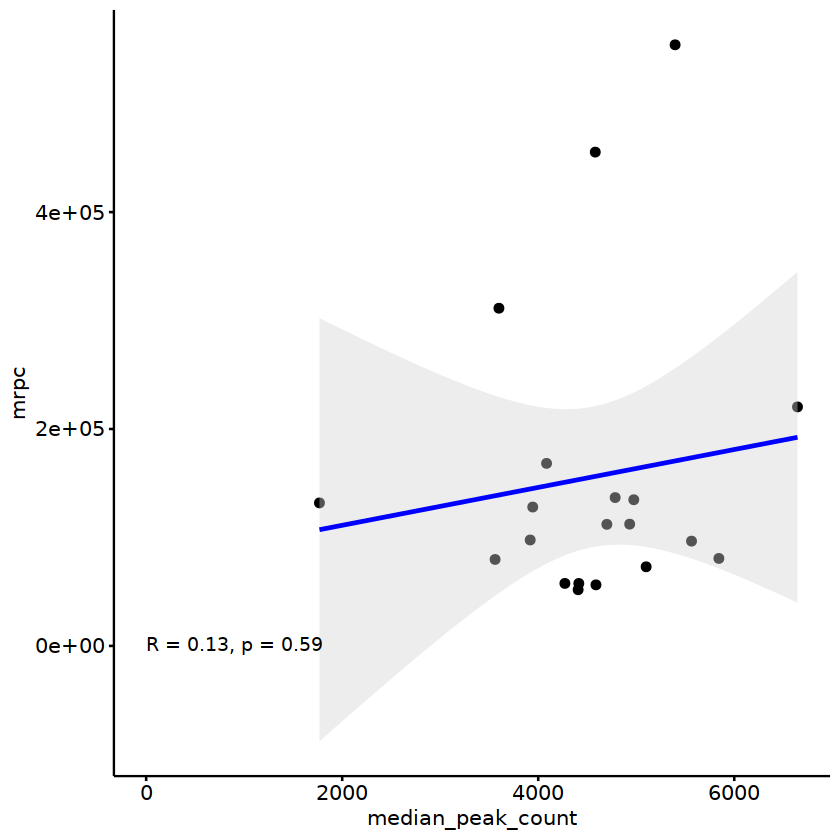

In [95]:
sp <- ggscatter(Shun_seq_stat, x = "median_peak_count", y = "mrpc",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
sp + stat_cor(method = "pearson", label.x = 3, label.y = 30)

`geom_smooth()` using formula 'y ~ x'



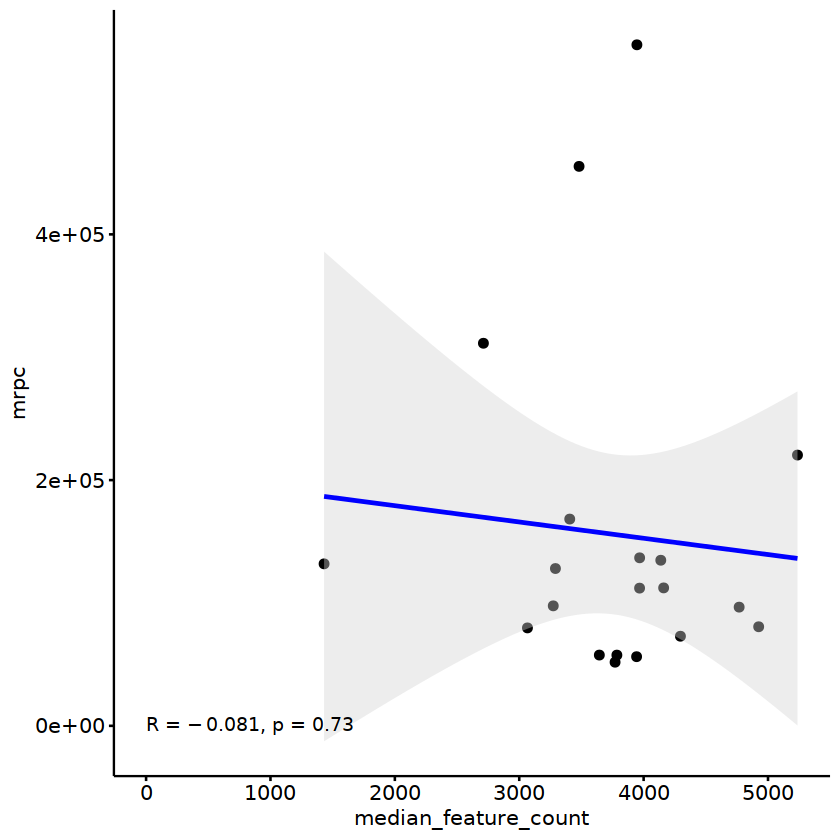

In [96]:
sp <- ggscatter(Shun_seq_stat, x = "median_feature_count", y = "mrpc",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
sp + stat_cor(method = "pearson", label.x = 3, label.y = 30)

In [97]:
### lets do the same for other studies
#2- Paul_ALS
paul_seq_stat <- seq_md %>% filter(Study=='Paul_ALS')
paul_seq_stat

Study,Sample,Pathology,mrpc,mgpc,ENC
<chr>,<chr>,<chr>,<int>,<int>,<int>
Paul_ALS,C9ALSFTLD1,C9ALSFTLD,31687,2573,5361
Paul_ALS,C9ALSFTLD2,C9ALSFTLD,29417,2323,10538
Paul_ALS,C9ALSFTLD3,C9ALSFTLD,53840,3531,11007
Paul_ALS,C9ALSFTLD4,C9ALSFTLD,73946,2568,6190
Paul_ALS,C9ALSFTLD5,C9ALSFTLD,138472,1201,4048
Paul_ALS,C9ALSFTLD6,C9ALSFTLD,125952,1378,4734
Paul_ALS,C9ALSFTLD7,C9ALSFTLD,56232,3471,9231
Paul_ALS,C9ALSnoFTLD1,C9ALSnoFTLD,52180,4210,11184
Paul_ALS,C9ALSnoFTLD2,C9ALSnoFTLD,97426,1385,4279


In [98]:
paul_peak_stat <- read.table('/data1/APA//Paul_ALS_Data/results/Paul_ALS_peak_stat.tsv', sep='\t')
paul_peak_stat

,samples,median_peak_count,median_feature_count
,<chr>,<dbl>,<dbl>
1,C9ALSFTLD1,6808.0,5217.0
2,C9ALSFTLD2,6039.0,4561.5
3,C9ALSFTLD3,12590.0,8552.0
4,C9ALSFTLD4,7683.0,5756.0
5,C9ALSFTLD5,2507.0,2027.5
6,C9ALSFTLD6,2940.0,2392.0
7,C9ALSnoFTLD1,9383.0,6861.0
8,C9ALSnoFTLD2,3113.0,2491.0
9,C9ALSnoFTLD3,9454.0,6804.0


In [101]:
toremove <- paul_seq_stat$Sample[which(!paul_seq_stat$Sample %in% paul_peak_stat$samples)]
paul_seq_stat <- paul_seq_stat %>% filter(Sample!=toremove)
paul_seq_stat

Study,Sample,Pathology,mrpc,mgpc,ENC
<chr>,<chr>,<chr>,<int>,<int>,<int>
Paul_ALS,C9ALSFTLD1,C9ALSFTLD,31687,2573,5361
Paul_ALS,C9ALSFTLD2,C9ALSFTLD,29417,2323,10538
Paul_ALS,C9ALSFTLD3,C9ALSFTLD,53840,3531,11007
Paul_ALS,C9ALSFTLD4,C9ALSFTLD,73946,2568,6190
Paul_ALS,C9ALSFTLD5,C9ALSFTLD,138472,1201,4048
Paul_ALS,C9ALSFTLD6,C9ALSFTLD,125952,1378,4734
Paul_ALS,C9ALSnoFTLD1,C9ALSnoFTLD,52180,4210,11184
Paul_ALS,C9ALSnoFTLD2,C9ALSnoFTLD,97426,1385,4279
Paul_ALS,C9ALSnoFTLD3,C9ALSnoFTLD,44548,3143,8479


In [102]:
paul_seq_stat <- arrange(paul_seq_stat, Sample)
paul_seq_stat$median_peak_count <- arrange(paul_peak_stat, samples)$median_peak_count
paul_seq_stat$median_feature_count <- arrange(paul_peak_stat, samples)$median_feature_count
paul_seq_stat

Study,Sample,Pathology,mrpc,mgpc,ENC,median_peak_count,median_feature_count
<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Paul_ALS,C9ALSFTLD1,C9ALSFTLD,31687,2573,5361,6808.0,5217.0
Paul_ALS,C9ALSFTLD2,C9ALSFTLD,29417,2323,10538,6039.0,4561.5
Paul_ALS,C9ALSFTLD3,C9ALSFTLD,53840,3531,11007,12590.0,8552.0
Paul_ALS,C9ALSFTLD4,C9ALSFTLD,73946,2568,6190,7683.0,5756.0
Paul_ALS,C9ALSFTLD5,C9ALSFTLD,138472,1201,4048,2507.0,2027.5
Paul_ALS,C9ALSFTLD6,C9ALSFTLD,125952,1378,4734,2940.0,2392.0
Paul_ALS,C9ALSnoFTLD1,C9ALSnoFTLD,52180,4210,11184,9383.0,6861.0
Paul_ALS,C9ALSnoFTLD2,C9ALSnoFTLD,97426,1385,4279,3113.0,2491.0
Paul_ALS,C9ALSnoFTLD3,C9ALSnoFTLD,44548,3143,8479,9454.0,6804.0


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



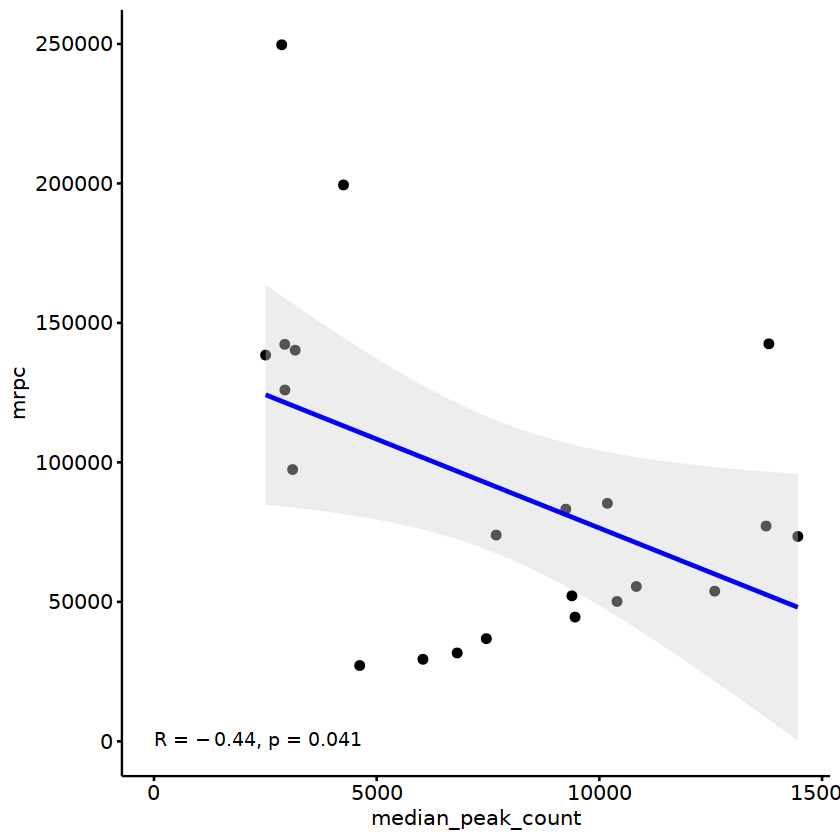

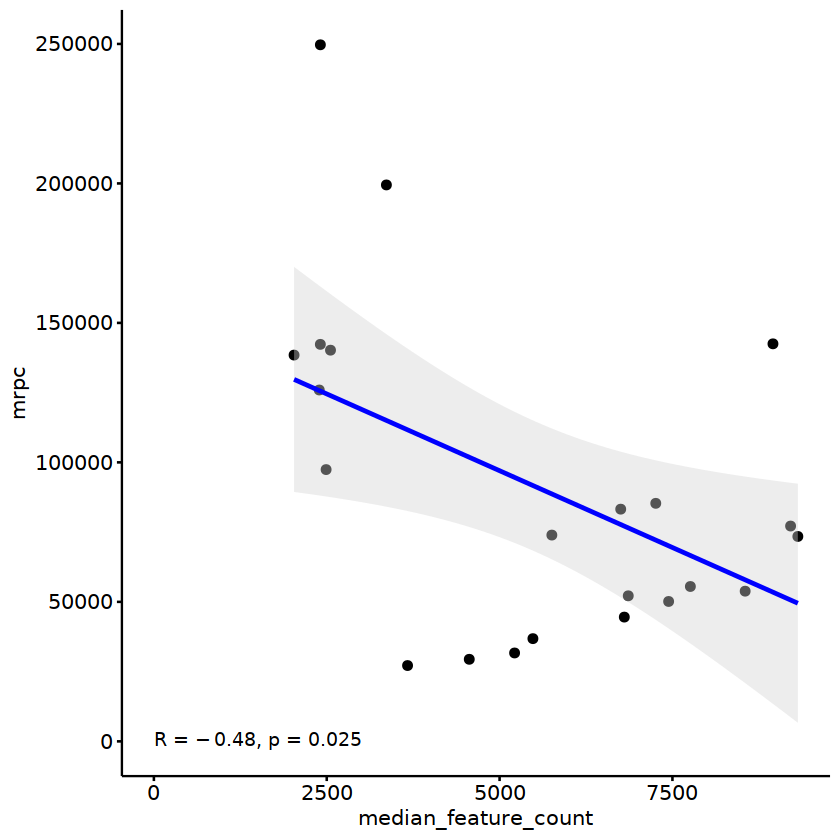

In [103]:
sp <- ggscatter(paul_seq_stat, x = "median_peak_count", y = "mrpc",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
sp + stat_cor(method = "pearson", label.x = 3, label.y = 30)

sp2 <- ggscatter(paul_seq_stat, x = "median_feature_count", y = "mrpc",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
sp2 + stat_cor(method = "pearson", label.x = 3, label.y = 30)

In [104]:
## now for Dim and Kapmann
Kapmann_seq_stat <- seq_md %>% filter(Study=='Kapmann_AD')
Kapmann_seq_stat

Study,Sample,Pathology,mrpc,mgpc,ENC
<chr>,<chr>,<chr>,<int>,<int>,<int>
Kapmann_AD,SFG1,AD,181944,851,1490
Kapmann_AD,SFG2,AD,322296,1062,3716
Kapmann_AD,SFG3,AD,119067,701,2458
Kapmann_AD,SFG4,AD,271345,1096,3444
Kapmann_AD,SFG5,AD,172723,885,4681
Kapmann_AD,SFG6,AD,218938,557,3473
Kapmann_AD,SFG7,AD,240220,1192,3122
Kapmann_AD,SFG8,AD,77538,720,5999
Kapmann_AD,SFG9,AD,165263,775,4998


In [105]:
Kapmann_peaks_stats <- read.table('Dimitry_Velmeshev_ASD/results/Kapmann_peaks_stats.tsv', sep='\t')
Kapmann_peaks_stats

,samples,median_peak_count,median_feature_count
,<chr>,<dbl>,<dbl>
1,SFG1,1282.0,1035.0
2,SFG10,2254.0,1810.0
3,SFG2,1728.0,1435.0
4,SFG3,1187.0,1006.0
5,SFG4,1618.5,1362.5
6,SFG5,2554.0,2069.0
7,SFG6,2220.5,1699.0
8,SFG8,1514.0,1290.0
9,SFG9,2669.0,2168.0


In [106]:
Kapmann_seq_stat <- Kapmann_seq_stat %>% filter(Sample!='SFG7')

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



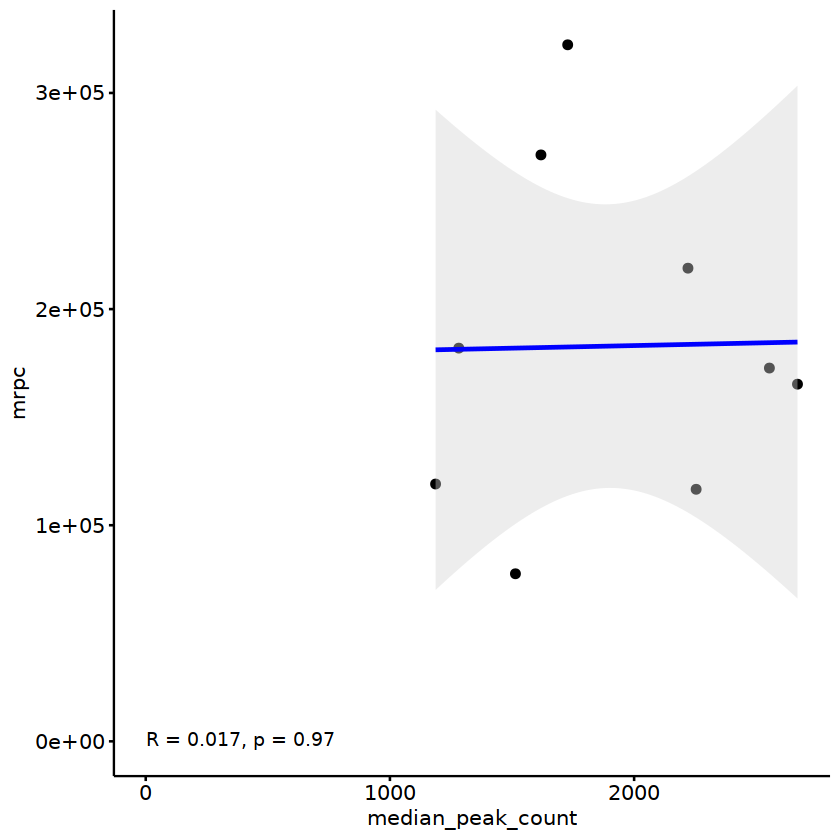

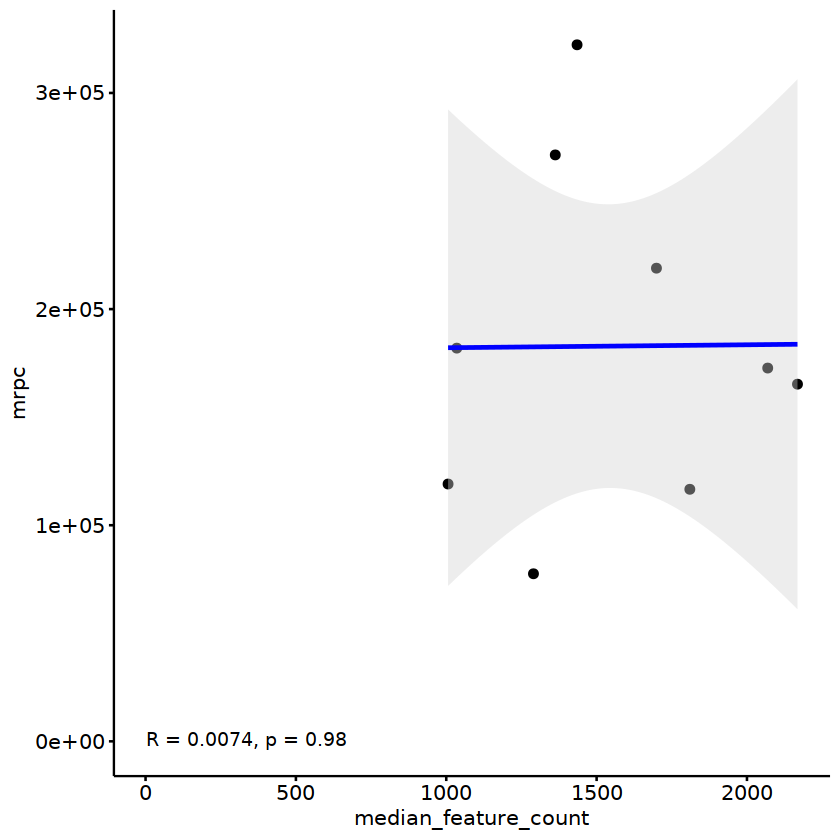

In [107]:
Kapmann_seq_stat <- arrange(Kapmann_seq_stat, Sample)
Kapmann_seq_stat$median_peak_count <- arrange(Kapmann_peaks_stats, samples)$median_peak_count
Kapmann_seq_stat$median_feature_count <- arrange(Kapmann_peaks_stats, samples)$median_feature_count

## plot
sp <- ggscatter(Kapmann_seq_stat, x = "median_peak_count", y = "mrpc",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
sp + stat_cor(method = "pearson", label.x = 3, label.y = 30)

sp2 <- ggscatter(Kapmann_seq_stat, x = "median_feature_count", y = "mrpc",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
sp2 + stat_cor(method = "pearson", label.x = 3, label.y = 30)

In [108]:
Dim_seq_stat <- seq_md %>% filter(Study=='Dim_ct')
Dim_seq_stat

Study,Sample,Pathology,mrpc,mgpc,ENC
<chr>,<chr>,<chr>,<int>,<int>,<int>
Dim_ct,4341_BA46,CTRL,77371,896,3349
Dim_ct,5387_BA9,CTRL,46043,1218,6202
Dim_ct,5408_PFC_Nova,CTRL,130441,874,1784
Dim_ct,5538_PFC_Nova,CTRL,87607,599,2825
Dim_ct,5577_BA9,CTRL,69995,775,3784
Dim_ct,5879_PFC_Nova,CTRL,176428,1084,1432
Dim_ct,5893_PFC,CTRL,79500,608,2852
Dim_ct,5936_PFC_Nova,CTRL,149344,663,1558
Dim_ct,5958_BA9,CTRL,183530,1554,1720


In [109]:
Dim_peaks_stats <- read.table('Dimitry_Velmeshev_ASD/results/Dim_peaks_stats.tsv', sep='\t')
Dim_peaks_stats

,samples,median_peak_count,median_feature_count
,<chr>,<dbl>,<dbl>
1,4341_BA46,2829.0,2387.0
2,5387_BA9,3862.0,3301.0
3,5408_PFC_Nova,2825.0,2332.0
4,5538_PFC_Nova,3231.0,2508.0
5,5577_BA9,2620.0,2237.0
6,5879_PFC_Nova,3309.5,2713.5
7,5893_PFC,2649.0,2148.0
8,5936_PFC_Nova,3056.0,2501.0
9,5958_BA9,6034.0,5001.0


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



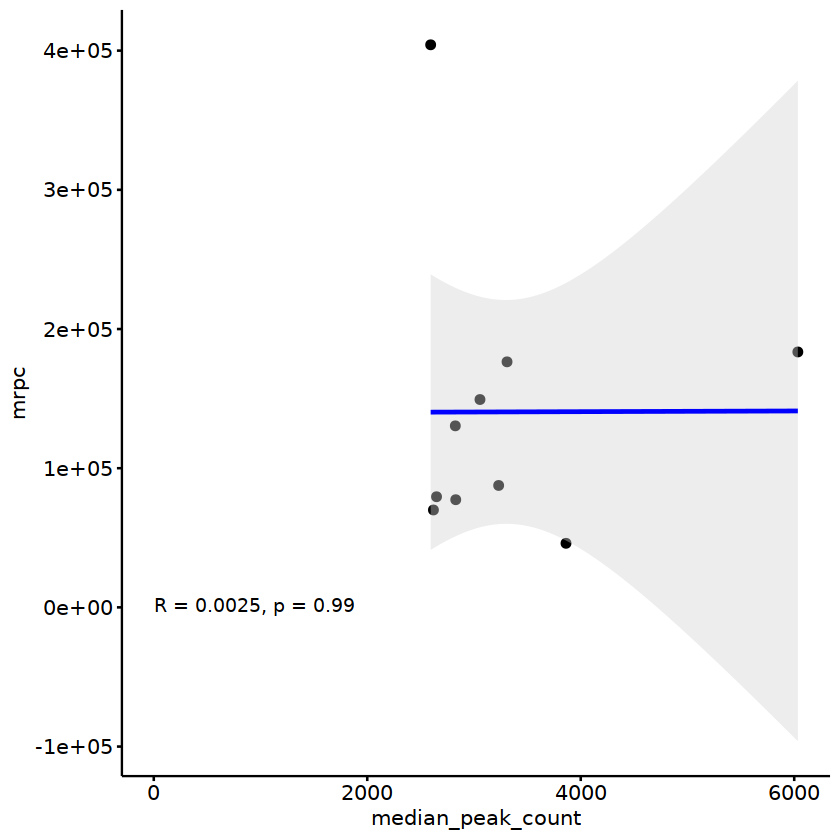

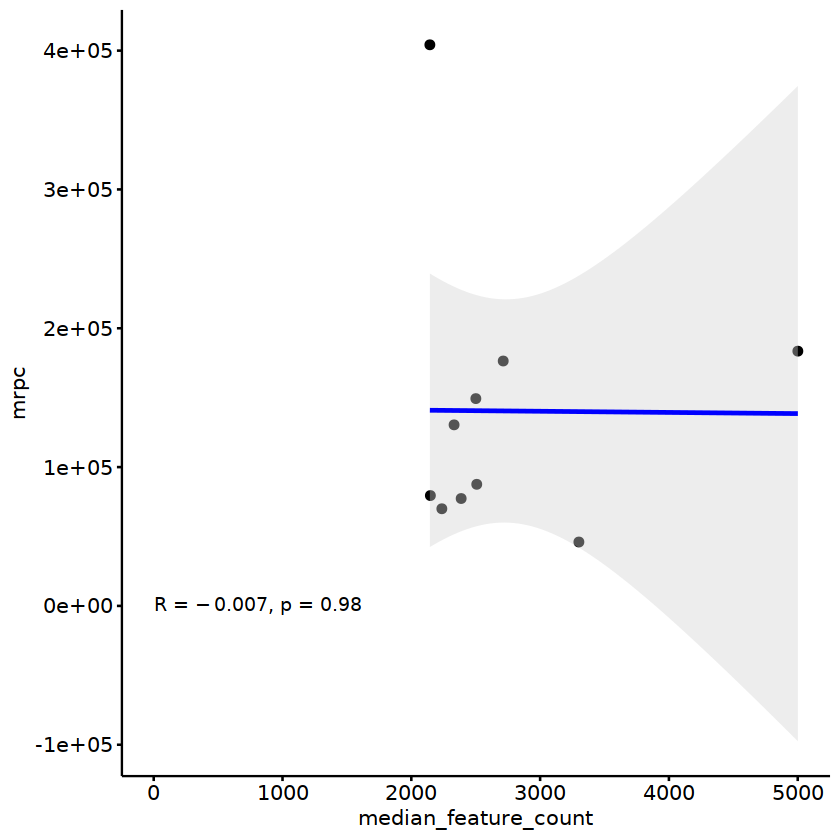

In [110]:
Dim_seq_stat <- arrange(Dim_seq_stat, Sample)
Dim_seq_stat$median_peak_count <- arrange(Dim_peaks_stats, samples)$median_peak_count
Dim_seq_stat$median_feature_count <- arrange(Dim_peaks_stats, samples)$median_feature_count

## plot
sp <- ggscatter(Dim_seq_stat, x = "median_peak_count", y = "mrpc",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )
sp + stat_cor(method = "pearson", label.x = 3, label.y = 30)

sp2 <- ggscatter(Dim_seq_stat, x = "median_feature_count", y = "mrpc",
   add = "reg.line",  # Add regressin line
   add.params = list(color = "blue", fill = "lightgray"), # Customize reg. line
   conf.int = TRUE # Add confidence interval
   )

sp2 + stat_cor(method = "pearson", label.x = 3, label.y = 30)

In [111]:
##### overall counts median
overal_peaks_stat <- rbind(Dim_peaks_stats, Kapmann_peaks_stats, shun_peak_stat, paul_peak_stat)
overal_peaks_stat <- arrange(overal_peaks_stat, samples)
overal_peaks_stat

,samples,median_peak_count,median_feature_count
,<chr>,<dbl>,<dbl>
1,4341_BA46,2829.0,2387.0
2,5387_BA9,3862.0,3301.0
3,5408_PFC_Nova,2825.0,2332.0
4,5538_PFC_Nova,3231.0,2508.0
5,5577_BA9,2620.0,2237.0
6,5879_PFC_Nova,3309.5,2713.5
7,5893_PFC,2649.0,2148.0
8,5936_PFC_Nova,3056.0,2501.0
9,5958_BA9,6034.0,5001.0


In [112]:
overal_seq_stat <- rbind(Dim_seq_stat, Kapmann_seq_stat, Shun_seq_stat, paul_seq_stat)

In [113]:
overal_peaks_stat$pathology <- arrange(overal_seq_stat, Sample)$Pathology
overal_peaks_stat$Study <- arrange(overal_seq_stat, Sample)$Study
overal_peaks_stat

,samples,median_peak_count,median_feature_count,pathology,Study
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,4341_BA46,2829.0,2387.0,CTRL,Dim_ct
2,5387_BA9,3862.0,3301.0,CTRL,Dim_ct
3,5408_PFC_Nova,2825.0,2332.0,CTRL,Dim_ct
4,5538_PFC_Nova,3231.0,2508.0,CTRL,Dim_ct
5,5577_BA9,2620.0,2237.0,CTRL,Dim_ct
6,5879_PFC_Nova,3309.5,2713.5,CTRL,Dim_ct
7,5893_PFC,2649.0,2148.0,CTRL,Dim_ct
8,5936_PFC_Nova,3056.0,2501.0,CTRL,Dim_ct
9,5958_BA9,6034.0,5001.0,CTRL,Dim_ct


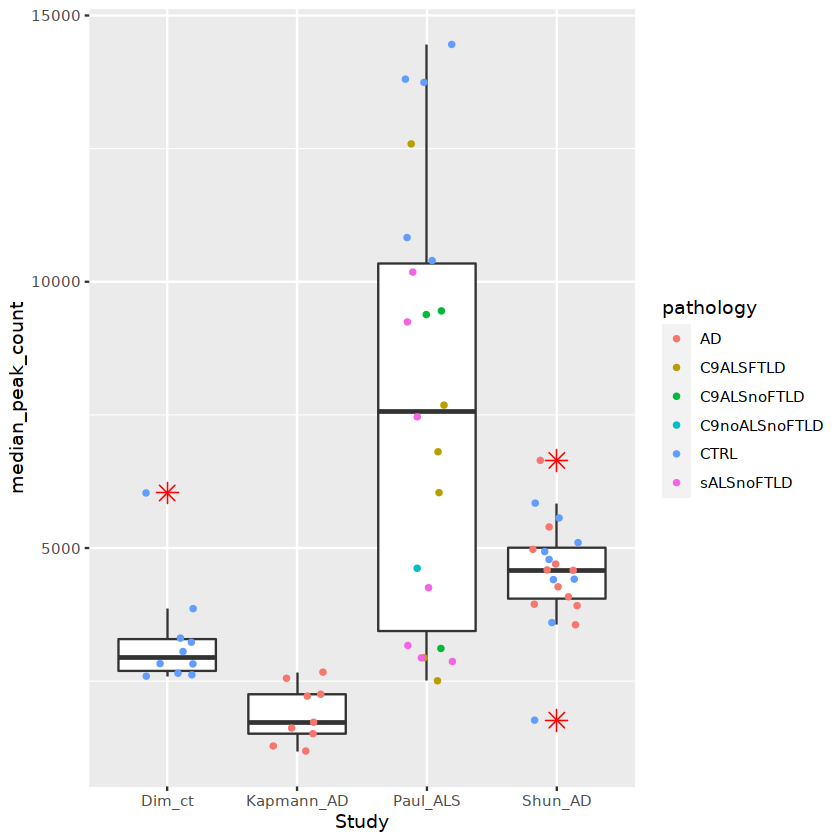

In [114]:
p <- ggplot(overal_peaks_stat, aes(x=Study, y=median_peak_count)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) + 
    geom_jitter(aes(colour = pathology), shape=16, position=position_jitter(0.2))
p

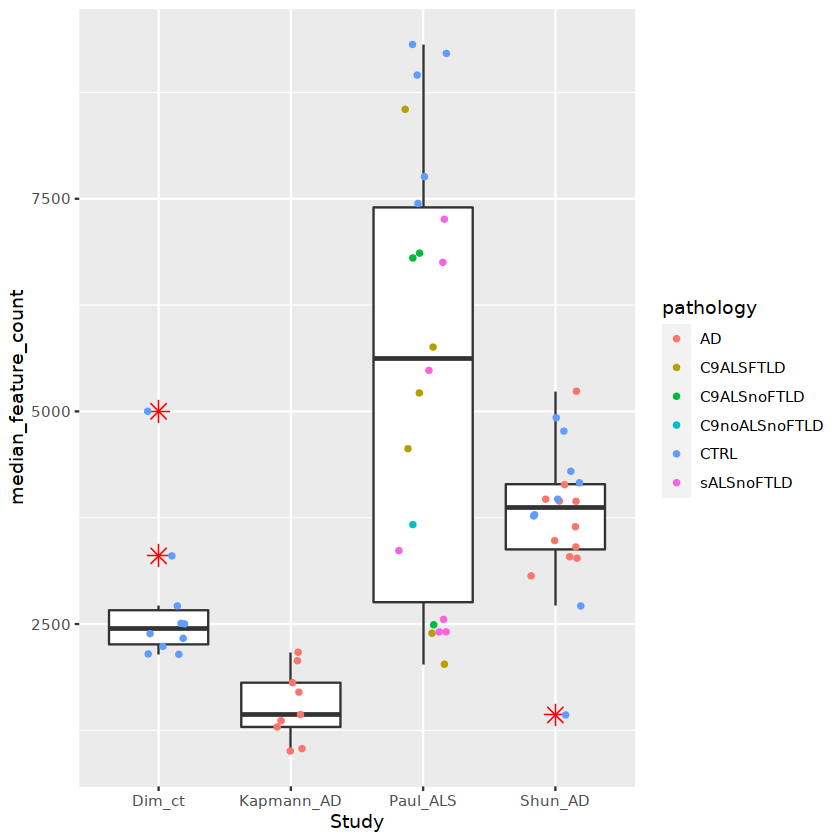

In [115]:
p <- ggplot(overal_peaks_stat, aes(x=Study, y=median_feature_count)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) + 
    geom_jitter(aes(colour = pathology), shape=16, position=position_jitter(0.2))
p

## Ok now lets take a look at other confounding factors like Age and sex

In [74]:
patient_md <- read.table('sample_patient_metadata.tsv', sep='\t', header=T)                              
patient_md

Study,Sample,Pathology,Age,Sex
<chr>,<chr>,<chr>,<int>,<chr>
Paul_ALS,C9ALSFTLD1,C9ALSFTLD,60,Male
Paul_ALS,C9ALSFTLD2,C9ALSFTLD,60,Male
Paul_ALS,C9ALSFTLD3,C9ALSFTLD,58,Male
Paul_ALS,C9ALSFTLD4,C9ALSFTLD,47,Female
Paul_ALS,C9ALSFTLD5,C9ALSFTLD,59,Female
Paul_ALS,C9ALSFTLD6,C9ALSFTLD,72,Male
Paul_ALS,C9ALSFTLD7,C9ALSFTLD,57,Male
Paul_ALS,C9ALSnoFTLD1,C9ALSnoFTLD,71,Female
Paul_ALS,C9ALSnoFTLD2,C9ALSnoFTLD,66,Female


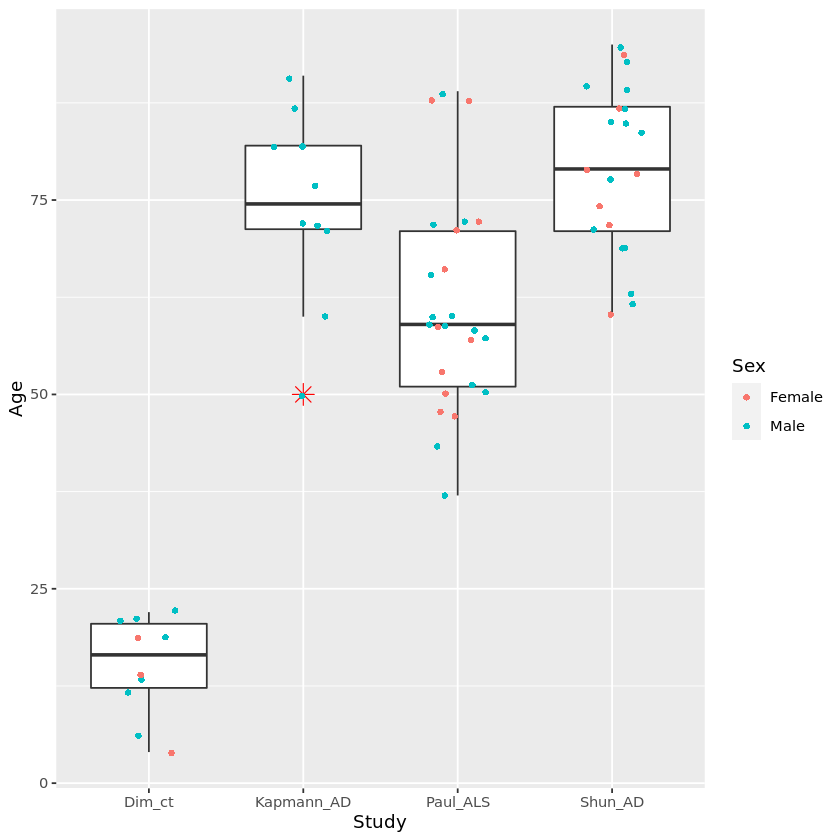

In [76]:
p <- ggplot(patient_md, aes(x=Study, y=Age)) + 
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) + 
    geom_jitter(aes(colour = Sex), shape=16, position=position_jitter(0.2))
p